In [1]:
import pandas as pd
import numpy as np

from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

### Read the data

In [3]:
data = pd.read_csv('../preprocessed_all_countries_combined_comments.csv')

In [4]:
data.head()

,Unnamed: 0,created_utc,date,body,subreddit,income_group,permalink,subjectivity,polarity,label,total_cases,new_cases
0,0,1.643123e+09,2022-01-25,fair I think home citizenship relevant visa tr...,australia,upper,/r/australia/comments/sccs51/visitor_informati...,0.480000,0.360000,positive,2340046.0,52920.0
1,1,1.642923e+09,2022-01-23,I shave business day agree pick directly passp...,australia,upper,/r/australia/comments/sao21y/how_long_does_it_...,0.575000,0.200000,positive,2229104.0,32234.0
2,2,1.642822e+09,2022-01-22,usual mask covid passport event size limit bun...,australia,upper,/r/australia/comments/s9n0mw/who_wants_to_get_...,0.250000,-0.250000,negative,2196870.0,67182.0
3,3,1.642143e+09,2022-01-14,nz citizen live aus fly plenty fly nz passport...,australia,upper,/r/australia/comments/s3h17y/travelling_to_aus...,0.797222,0.559091,positive,1613249.0,86288.0
4,4,1.642146e+09,2022-01-14,need person consent record blur face man trave...,australia,upper,/r/australia/comments/s3lz4w/djokovic_visa_can...,0.000000,0.000000,neutral,1613249.0,86288.0


### Get label column

In [6]:
label = data.loc[:, 'label'].values
print(label)

['positive' 'positive' 'negative' ... 'positive' 'positive' 'negative']


### Train-test-split

In [7]:
X_train, X_test, y_train, y_test = train_test_split (data['body'], label, test_size=0.3, random_state=0)

### Label encoder

In [8]:
Encoder = LabelEncoder()
print(y_train[:10])
y_train = Encoder.fit_transform(y_train)
print(y_train[:10])
y_test = Encoder.fit_transform(y_test)

['positive' 'positive' 'negative' 'negative' 'positive' 'neutral'
 'neutral' 'positive' 'positive' 'negative']
[2 2 0 0 2 1 1 2 2 0]


### TFIDF vectorizer

In [9]:
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True)

X_train_tfidf = vectorizer.fit_transform(X_train.values.astype(str))
X_test_tfidf = vectorizer.transform(X_test.values.astype(str))

print(X_train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Fit the linear vector classifier

In [10]:
# 3 kernel var. polinom, rbf ve lineer. default rbf
# svc = SVC(kernel='linear', cache_size=10000)LinearSVC()
svc = LinearSVC()
# train
svc.fit(X_train_tfidf, y_train)

LinearSVC()

### Get predictions from the model

In [12]:
# predict the labels on validation dataset
predictions_SVM = svc.predict(X_test_tfidf)

In [13]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.8466129513578037


## 1. Learning Curve

In [14]:
train_sizes, train_scores, test_scores = learning_curve(LinearSVC(), X_train_tfidf, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)

[learning_curve] Training set sizes: [  70  212  354  496  638  781  923 1065 1207 1349 1491 1633 1775 1918
 2060 2202 2344 2486 2628 2770 2913 3055 3197 3339 3481 3623 3765 3908
 4050 4192 4334 4476 4618 4760 4902 5045 5187 5329 5471 5613 5755 5897
 6040 6182 6324 6466 6608 6750 6892 7035]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.4s finished


In [15]:
# getting mean values of training score
train_mean = np.mean(train_scores, axis=1)
train_mean

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99987196, 0.99989166, 0.9999061 , 0.99991715, 0.99992587,
       0.99939638, 0.99938763, 0.99943662, 0.99911366, 0.99912621,
       0.99913715, 0.99923208, 0.99907482, 0.99908676, 0.99870036,
       0.99814624, 0.99846154, 0.99843603, 0.9982929 , 0.99796036,
       0.99737786, 0.99742364, 0.99774821, 0.99785185, 0.9978292 ,
       0.99764652, 0.99736372, 0.99720658, 0.99728992, 0.99726642,
       0.99754212, 0.99745518, 0.99737287, 0.997569  , 0.99743453,
       0.99749783, 0.99735459, 0.99746689, 0.99754125, 0.99734345,
       0.99716981, 0.99713983, 0.99699259, 0.99722867, 0.99711443])

In [16]:
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

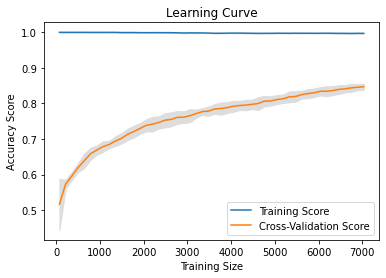

In [17]:
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

### 2. Model Evaluation
>**TN / True Negative:** the case was negative and predicted negative<br>
**TP / True Positive:** the case was positive and predicted positive<br>
**FN / False Negative:** the case was positive but predicted negative<br>
**FP / False Positive:** the case was negative but predicted positive<br>

#### 2.1. Accuracy

In [19]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.8466129513578037


#### 2.2. F-Measure
>**What percent of positive predictions were correct?**<br>
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [21]:
print(f1_score(y_test, predictions_SVM, average="macro"))

0.8263503304874474


#### 2.3. Precision
>**Accuracy of positive predictions.**<br>
Precision = TP/(TP + FP)

In [22]:
print(precision_score(y_test, predictions_SVM, average="macro"))

0.8391254602739183


#### 2.4. Recall
>**What percent of the positive cases did you catch?**<br>
Recall = TP/(TP+FN)

In [23]:
print(recall_score(y_test, predictions_SVM, average="macro")) 

0.8159698464561043
